In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("LoansTrainingSet.csv", low_memory=False)
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [18]:
df.shape

(256984, 19)

Text(0.5, 0, 'Eksik Oran (%)')

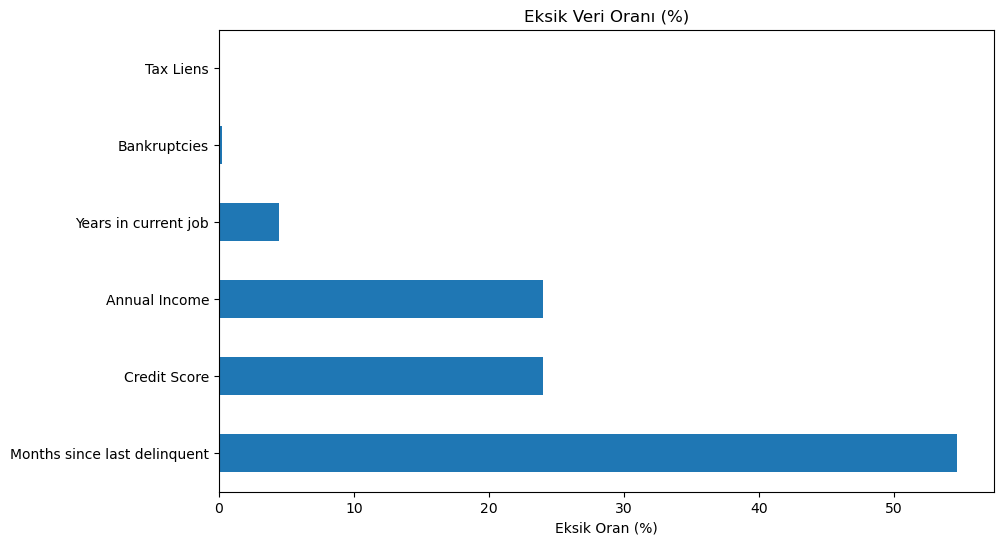

In [20]:
missing = (df.isnull().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing.plot(kind='barh', figsize=(10,6), title="Eksik Veri Oranı (%)")
plt.xlabel("Eksik Oran (%)")

In [22]:
df = df.loc[:, df.isnull().mean() < 0.5]

In [26]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for col in num_cols:
    if df[col].isnull().sum() > 0:
      df[col] = df[col].fillna(df[col].median())
for col in cat_cols:
    if df[col].isnull().sum() > 0:
      df[col] = df[col].fillna(df[col].mode()[0])

In [30]:
df["Monthly Debt"] = df["Monthly Debt"].replace(r'[\$,]', '', regex=True).astype(float)
df["Credit Score"] = pd.to_numeric(df["Credit Score"], errors='coerce')

In [35]:
df.isnull().sum().sort_values(ascending=False).head(10)

Loan ID                      0
Customer ID                  0
Bankruptcies                 0
Maximum Open Credit          0
Current Credit Balance       0
Number of Credit Problems    0
Number of Open Accounts      0
Years of Credit History      0
Monthly Debt                 0
Purpose                      0
dtype: int64

In [37]:
df.select_dtypes(include="object").nunique().sort_values()

Loan Status                  2
Term                         2
Home Ownership               4
Purpose                     10
Years in current job        11
Maximum Open Credit      68987
Loan ID                 215700
Customer ID             215700
dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encode_cols = ["Home Ownership", "Purpose", "Term", "Loan Status"]

for col in encode_cols:
    df[col] = le.fit_transform(df[col])

In [43]:
df["Maximum Open Credit"] = df["Maximum Open Credit"].replace(r'[\$,]', '', regex=True)
df["Maximum Open Credit"] = pd.to_numeric(df["Maximum Open Credit"], errors="coerce")

In [45]:
df["Credit Utilization"] = df["Current Credit Balance"] / (df["Maximum Open Credit"] + 1)

In [47]:
X = df.drop("Loan Status", axis=1)
y = df["Loan Status"]

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
X.select_dtypes(include="object").head()

,Loan ID,Customer ID,Years in current job
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,10+ years
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,4 years
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,10+ years
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,10+ years
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,4 years


In [69]:
X = X.drop(["Loan ID", "Customer ID"], axis=1, errors="ignore")

In [73]:
df["Years in current job"] = df["Years in current job"].astype(str) 
df["Years in current job"] = df["Years in current job"].replace({
    '10+ years': '10',
    '< 1 year': '0',
    'n/a': np.nan
})

df["Years in current job"] = df["Years in current job"].str.extract(r"(\d+)").astype(float)

In [75]:
X["Years in current job"] = df["Years in current job"]

In [79]:
X = X.dropna()
y = y[X.index]

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [83]:
from sklearn.metrics import classification_report

y_pred_log = log_model.predict(X_test)
classification_report(y_test, y_pred_log, output_dict=False)

'              precision    recall  f1-score   support\n\n           0       0.98      0.20      0.34     20197\n           1       0.73      1.00      0.84     44048\n\n    accuracy                           0.75     64245\n   macro avg       0.86      0.60      0.59     64245\nweighted avg       0.81      0.75      0.68     64245\n'

In [85]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Text(0, 0.5, 'Özellik')

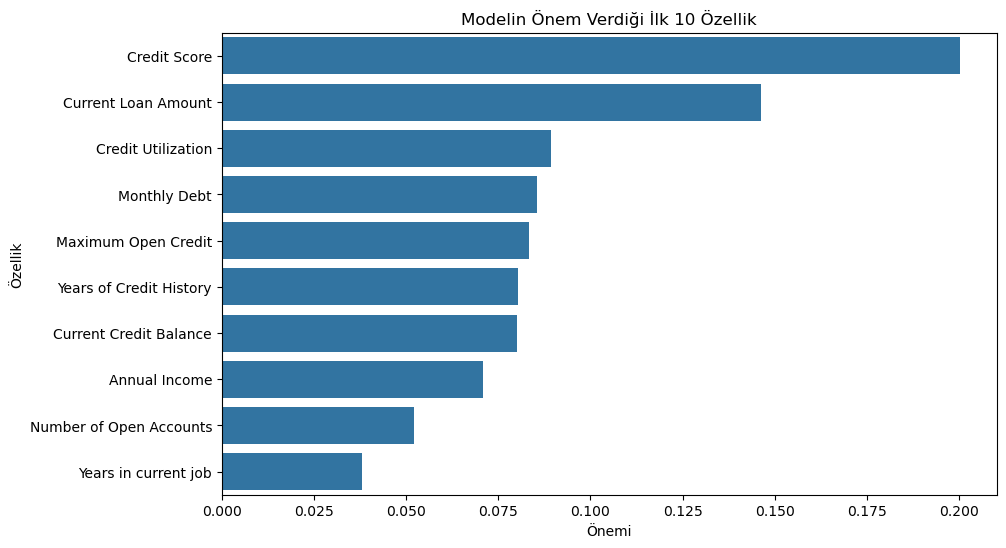

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Modelin Önem Verdiği İlk 10 Özellik")
plt.xlabel("Önemi")
plt.ylabel("Özellik")